# **Load the dataset**

In [ ]:
## Machine Learning - Linear Regression
#
# X refers to the population size in 10,000s
# Y refers to the profit in $10,000s

import numpy as np
from google.colab import drive, files
drive.mount('/content/drive/')
path = "/content/drive/My Drive/ex2data1.txt"

Mounted at /content/drive/


# **Task 1: Basic Python Function**

In [ ]:
##==================== Task 1: Basic Function ====================

# 5x5 matrix with 1's on main diagnol

import numpy as np
def iden(a):                   # function definition
  b = np.zeros((a, a))
  for i in range(a):
    b[i, i] = 1
  return b

print("Matrix a : \n", iden(5))   # function call

Matrix a : 
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


# **Task 2: Plotting Data**

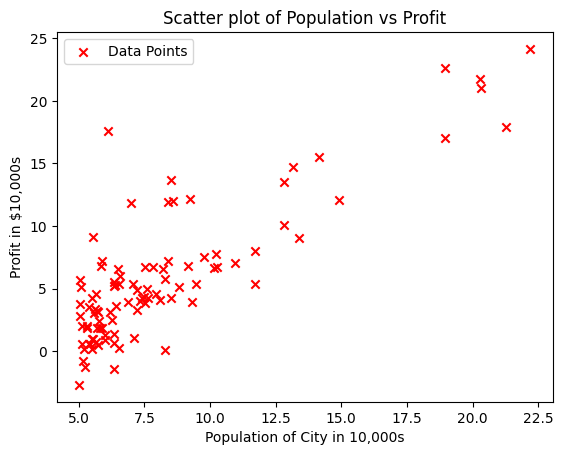

In [ ]:
## ======================= Task 2: Plotting =======================

import matplotlib.pyplot as plt

# used for manipulating directory paths
import os

# Read comma separated data
data = np.loadtxt(os.path.join('Data', path ), delimiter=',')
X, Y = data[:, 0], data[:, 1]

def plotdata(a,b):
  # plotting points as a scatter plot
    plt.scatter(X, Y, marker='x', c='r', label='Data Points')

    # Labeling the plot
    plt.title('Scatter plot of Population vs Profit')
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')

    # Display the legend
    plt.legend()
    return

plotdata(X,Y)  # function Call
plt.show()

DO NOT run this block more than one time

In [ ]:
m = Y.size  # number of training examples
X = np.stack([np.ones(m), X], axis=1) # it used to convert X in to (97x2), first colum is all ones to get  where theta is (2x1)    "theta[0]+theta[1]*X"
print(X.shape)

(97, 2)


# **Task 3: Computing** cost

With theta = [0, 0] 
Cost computed = 32.072733877455676
Expected cost value (approximately) 32.07



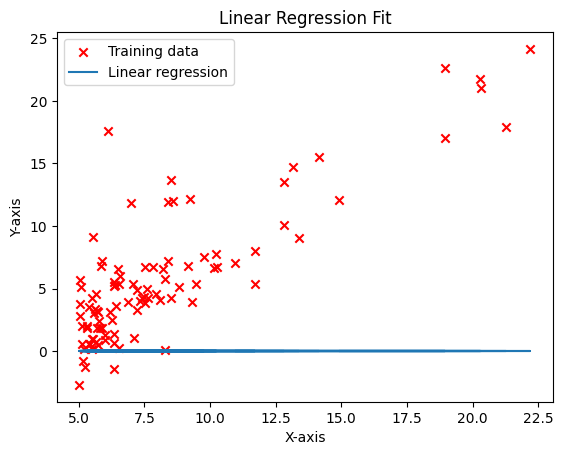

In [ ]:
## ======================= Task 3: Computing Cost =======================

import numpy as np

def computeCost(X,y , theta):
  m = y.size
  J = 0    # You need to return this parameter correctly
  h = np.dot(X, theta)
  J = (1 / (2 * m)) * np.sum((h - y) ** 2)
  return J

J = computeCost(X, Y, theta=np.array([0,0]))
print('With theta = [0, 0] \nCost computed =', J)
print('Expected cost value (approximately) 32.07\n')

X, Y = data[:, 0], data[:, 1]
plt.scatter(X, Y, marker='x', c='r', label='Training data')
plt.plot(X, X*0+0, label='Linear regression')


# Labeling the plot
plt.title('Linear Regression Fit')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Display the plot
plt.show()

# **Task4: Gradient Descent**

With theta = [-3.63029144  1.16636235] 
Cost computed = 4.483388256587725


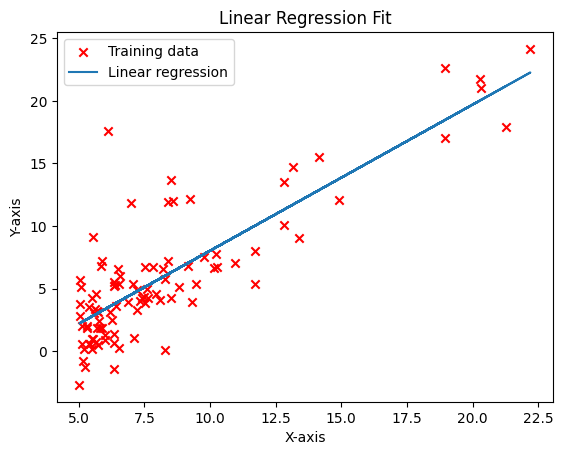

In [ ]:
## ======================= Task 4: Gradient Descent =======================

def gradientDescent(X, y, theta, alpha, num_iters):
  m = y.shape[0]
  theta = theta.copy()
  J_history = []

  for i in range(num_iters):
    h = np.dot(X, theta)
    theta = theta - (alpha / m) * np.dot(X.T, (h - y))
    J_history.append(computeCost(X, y, theta))
  return theta, J_history


# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
iterations = 1500
alpha = 0.01
theta, J_history = gradientDescent(X ,Y, theta, alpha, iterations)
J = computeCost(X, Y, theta)
print(f'With theta = {theta} \nCost computed = {J}')

# plot the linear fit
X, Y = data[:, 0], data[:, 1]
plt.scatter(X, Y, marker='x', c='r', label='Training data')
plt.plot(X, X*theta[1]+theta[0], label='Linear regression')


# Labeling the plot
plt.title('Linear Regression Fit')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Display the plot
plt.show()


Producing 2D plots and contour Plots

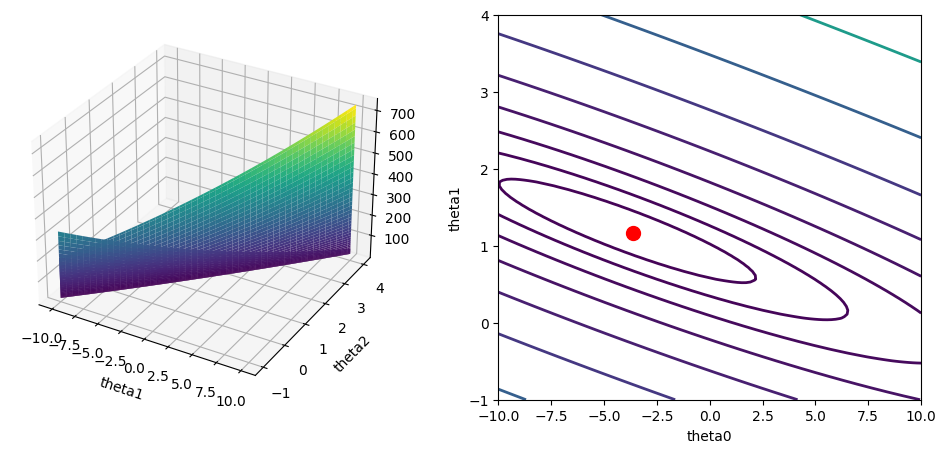

In [ ]:
# Plotting library
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# grid over which we will calculate J COST
t0 = np.linspace(-10, 10, 100)
t1 = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((t0.shape[0], t1.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(t0):
    for j, theta1 in enumerate(t1):
        J_vals[i, j] = computeCost(X,Y, [theta0, theta1])

# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

# surface plot
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(t0, t1, J_vals, cmap='viridis')
ax.set_xlabel('theta1')
ax.set_ylabel('theta2')


# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax2 = plt.subplot(122)
ax2.contour(t0, t1, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
ax2.set_xlabel('theta0')
ax2.set_ylabel('theta1')
ax2.plot(theta[0], theta[1], 'ro', ms=10, lw=2)

pass

# **Task5: Feature Normalization**

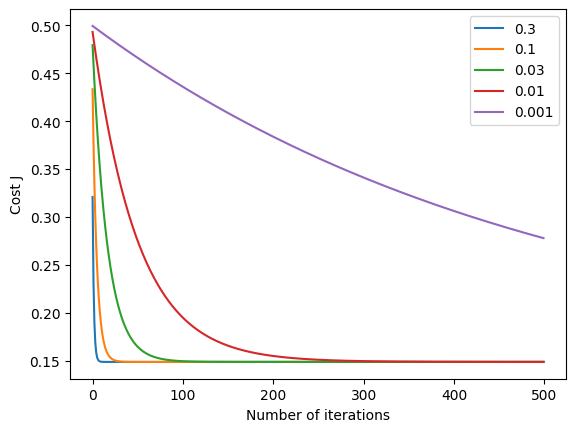

In [ ]:
## ======================= Task 5: Feature Normalization =======================

# Read comma separated data
data = np.loadtxt(os.path.join('Data', path ), delimiter=',')
X, Y = data[:, 0], data[:, 1]


def  featureNormalize(X):
    mu = np.mean(X)
    sigma = np.std(X)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

X, mu, sigma = featureNormalize(X)
Y, mu, sigma = featureNormalize(Y)

X = np.stack([np.ones(m), X], axis=1)

# CHANGE THE VALUES of ALPHAS, 5 VALUES OF ALPHA
#PLOT LEARNING RATES FOR FOLLOWING FOR ALPHAS, NO NEED TO CHANGE THE CODE ONLY REQUIRE "gradientDescent" TO BE DEFINED CORRECTLY

def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = np.dot(X, theta)
        theta = theta - (alpha / m) * np.dot(X.T, (h - y))
        J_history.append(computeCost(X, y, theta))

    return theta, J_history

iterations = 500
alpha = [0.3,0.1,0.03,0.01,0.001] #--------------ENTER YOUR LEARNING RATES
costs=[]

for i in range(5):
  theta = np.zeros(2)
  theta, J_history = gradientDescent(X ,Y, theta, alpha[i], iterations)
# initialize fitting parameters
  costs.append(J_history)
# Plot the convergence graph

for i in range(5):
  plt.plot(np.arange(len(costs[i])), costs[i], label=str(alpha[i]))

plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.legend()
plt.show()